# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [1]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = list()
with open('train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]

### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

<!-- your answer to 1.3.1.1 -->
`ANSWER 1.3.1.1` \
The steps to implement are:
1. Importing the relevant libraries, loading the data, and dividing it into training and test sets are the first steps needed to execute linear regression. 
2. We next create the cost function and the gradient descent function are the next two functions. MSE is the cost function. Between the projected values and the actual target values, it calculates the average squared difference. To get the best values for the regression coefficients, the cost is minimised during the training procedure.
3. To reduce the cost function, an optimization approach called gradient descent is used. Iteratively updating the model coefficients (such as slope and intercept) in the direction of the steepest cost reduction is what makes this procedure possible.
4. We initialize weights and biases to 0 as a starting initialization. based on the formulas coded below, the weights and biases keeping updating themselves while fitting over the dataset. 

In [3]:
#converting the required data fields to numpy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 25)
(60, 25)
(240,)
(60,)


`ANSWER 1.3.1.2` \
**Implementing Linear Regression**

In [4]:
#cost function: MSE
def cost_function(x, y, w, b):
    cost = np.sum((y - (np.dot(x, w) + b))**2)/(2*len(y))
    return cost

#gradient descent function: minimize cost function
def gradient_descent_function(x, y, w, b, lr, epochs):
    cost_history = np.zeros(epochs) #list to store cost function
    for i in range(epochs):
        w = w - (lr/len(y)) * np.dot(x.T, (np.dot(x, w) + b - y)) #updating weights 
        b = b - (lr/len(y)) * np.sum(np.dot(x, w) + b - y) #updating biases
        cost_history[i] = cost_function(x, y, w, b)
    return w, b, cost_history

w = np.zeros(x_train.shape[1]) #initializing weights
b = 0 #initializing biases
epochs = 1000

**Plotting Final Cost vs Learning Rate** after set number of epochs

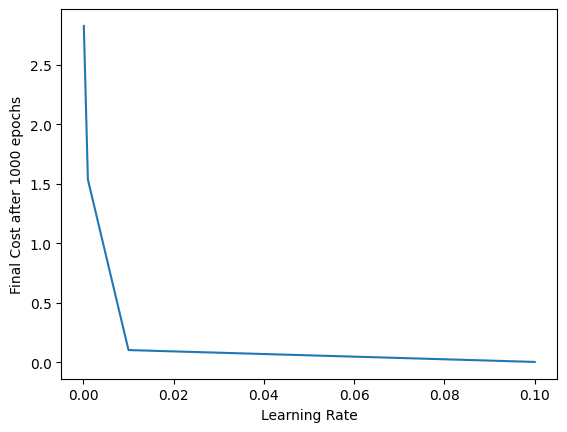

In [5]:
learning_rates = [0.0001, 0.001, 0.01, 0.1] #testing out different learning rates
final_cost = []
for lr in learning_rates:
    weights, biases, cost_history = gradient_descent_function(x_train, y_train, w, b, lr, epochs)
    final_cost.append(cost_history[-1])

plt.plot(learning_rates, final_cost)
plt.xlabel('Learning Rate')
plt.ylabel('Final Cost after {} epochs'.format(epochs))
plt.show()

**Plotting Cost curve across the Epochs for all Learning Rates**

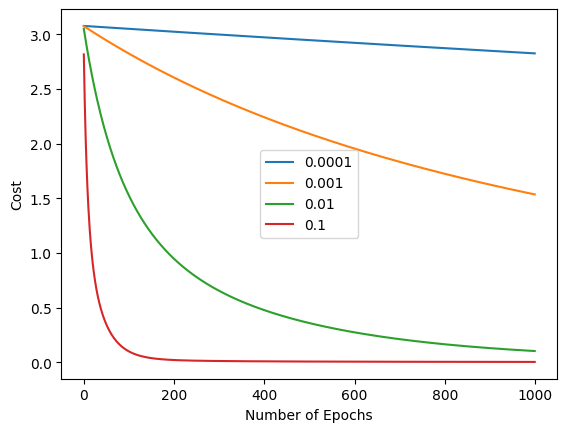

In [6]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
for lr in learning_rates:
    w = np.zeros(x_train.shape[1])
    b = 0
    epochs = 1000
    weights, biases, cost_history = gradient_descent_function(x_train, y_train, w, b, lr, epochs)
    plt.plot(range(epochs), cost_history, label = lr)
plt.xlabel("Number of Epochs")
plt.ylabel("Cost")
plt.legend()
plt.show()

`ANSWER 1.3.2.3`
The best learning rate we get from above is $lr=0.1$

In [7]:
w = np.zeros(x_train.shape[1])
b = 0
epochs = 1000
lr = 0.1
weights, biases, cost_history = gradient_descent_function(x_train, y_train, w, b, lr, epochs)

`ANSWER 1.3.1.4` \
**Parity Plot**

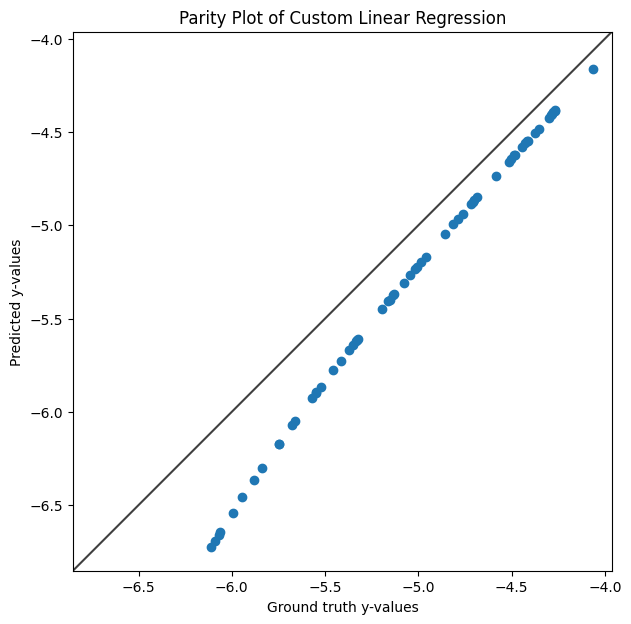

In [8]:
#Getting Prediction Values
y_pred = np.dot(x_test, weights) + biases
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.2.1 -->
`1.3.2.1 Answer` \
Ridge Regression is a variation of linear regression that prevents overfitting by including a penalty term in the loss function. The loss function is given an additional L2 regularisation term, which causes the coefficients of less significant features to converge to zero. Contrarily, linear regression does not include this factor and aims to reduce the residual sum of squares between the values of the actual response and those predicted by the linear approximation. The primary distinction between the two methods is that ridge regression strives to balance the model's fit with the size of the coefficients, whereas linear regression just aims to reduce the residuals.

`1.3.2.2 Answer` \
The regularisation term's intensity is determined by the `alpha` value. The L2 term is multiplied by a constant. Stronger regularisation, which decreases the coefficients toward zero and lessens overfitting, is produced by a higher `alpha` value. A weaker regularisation is produced by a lower `alpha` value, which gives the model more flexibility and raises the possibility of overfitting.

In [9]:
import sklearn
from sklearn.linear_model import Ridge

alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
rmses = []
for alpha in alphas:
    rdg = Ridge(alpha=alpha)
    rdg.fit(x_train, y_train)
    y_pred = rdg.predict(x_test)
    rmse = np.sqrt(np.mean((y_pred - y_test)**2))
    rmses.append(rmse)
    print('RMSE for alpha = {}: {}'.format(alpha, rmse))

RMSE for alpha = 1e-06: 0.04322877011591955
RMSE for alpha = 1e-05: 0.05087466159244004
RMSE for alpha = 0.0001: 0.1461433202130837
RMSE for alpha = 0.001: 0.07406137817163512
RMSE for alpha = 0.01: 0.307387079829212
RMSE for alpha = 0.1: 0.1093486199682341
RMSE for alpha = 1: 0.070871325286434
RMSE for alpha = 10: 0.8020392940375044
RMSE for alpha = 100: 3.2066312850557335
RMSE for alpha = 1000: 4.67482215489643
RMSE for alpha = 10000: 4.961126526811382
RMSE for alpha = 100000: 4.9931670490947395


<!-- Your answer to 1.3.2.3 -->
`1.3.2.3 Answer`
$alpha=1e-06$ gives the lowest RMSE score. \
We observe that after $alpha=10$, the RMSE values are significantly higher and keep rising. This indicates that there is underfitting happening. For values of $alpha=1e-05$ and lower, we see that the RMSE scores are decreasing and possibly giving a better fit. Compared to 2 lesser and more values surrounding $alpha=1$, it gives a better RMSE score. Indicating the presence of multiple local minimas of scores.

`1.3.2.4 Answer`

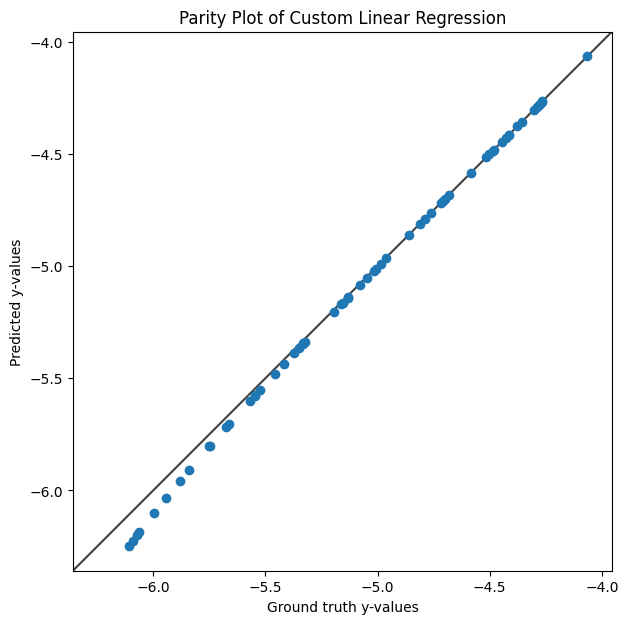

In [10]:
best_rdg = Ridge(alpha=0.000001)
best_rdg.fit(x_train, y_train)
y_pred = best_rdg.predict(x_test)
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.3.1 -->
`1.3.3.1 Answer` \
The Lasso Regression method adds a penalty term to the loss function equal to the absolute value of the magnitude of the coefficients. It is a form of regularisation approach for linear regression. By reducing the coefficients of less significant characteristics to zero, this technique aids in preventing overfitting.
The main distinction between the two methods is that Lasso Regression can reduce the coefficients of less significant features to zero by adding a penalty to the loss function, whereas Linear Regression just seeks to minimise the residual sum of squares.


`1.3.3.2 Answer`

In [11]:
from sklearn.linear_model import Lasso

alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_test)
    rmse = np.sqrt(np.mean((y_pred - y_test)**2))
    print('RMSE for alpha = {}: {}'.format(alpha, rmse))

RMSE for alpha = 1e-06: 0.32937669251531165
RMSE for alpha = 1e-05: 0.44189519197113886
RMSE for alpha = 0.0001: 0.6124899982744757
RMSE for alpha = 0.001: 0.17966732847322867
RMSE for alpha = 0.01: 0.042419962550167355
RMSE for alpha = 0.1: 0.4143688074221509
RMSE for alpha = 1: 4.269928072334981
RMSE for alpha = 10: 4.996771333559856
RMSE for alpha = 100: 4.996771333559856
RMSE for alpha = 1000: 4.996771333559856
RMSE for alpha = 10000: 4.996771333559856
RMSE for alpha = 100000: 4.996771333559856


<!-- Your answer to 1.3.3.3 -->
`1.3.3.3 Answer` \
The alpha parameter in Lasso Regression controls how strong the regularisation is. It is a constant that multiplies the L1 term and regulates the degree of regularisation. More regularisation is applied when the alpha value is high, and less regularisation is applied when the alpha value is low. The purpose of the regularisation factor in the Lasso Regression is to reduce the coefficients of the less significant characteristics until they are zero.

The lowest RMSE score we get is for $alpha=0.01$. For values lesser than that, the model is overfitting as we see a steady rise in RMSE scores. On the other hand, for values greater tham that, the model is clearly undefitting. 

`1.3.3.4 Answer`

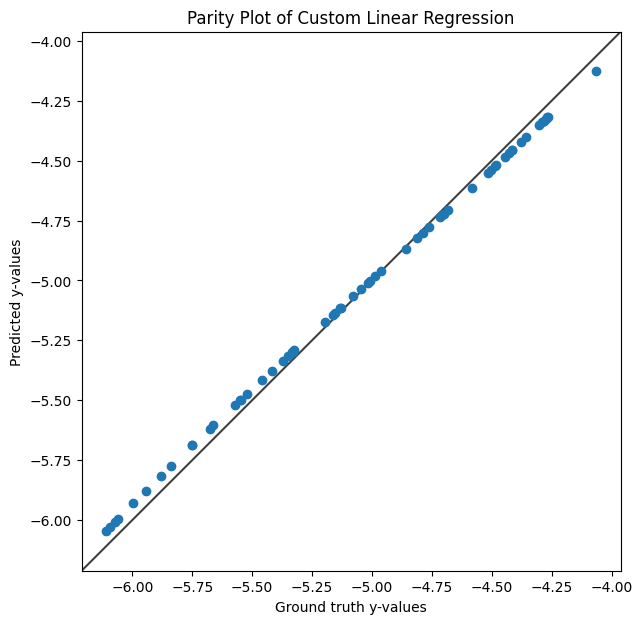

In [12]:
best_lasso = Lasso(alpha=0.01)
best_lasso.fit(x_train, y_train)
y_pred = best_lasso.predict(x_test)
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()